# Assessing the sales performance of the pizza shop for the pizza shop

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv(r"C:\Users\Muhammad Satrio\Documents\Aku\Data Analysis\Project Pizza\pizza_sales.csv")

In [30]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [31]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


## Total Sales Quantity by Flavor

In [44]:
grouped_flavor = df.groupby('pizza_name')
summ1 = grouped_flavor[['quantity']].sum()
srt1 = summ1.sort_values(by="quantity", ascending= False)

srt1

,quantity
pizza_name,
The Classic Deluxe Pizza,2453
The Barbecue Chicken Pizza,2432
The Hawaiian Pizza,2422
The Pepperoni Pizza,2418
The Thai Chicken Pizza,2371
The California Chicken Pizza,2370
The Sicilian Pizza,1938
The Spicy Italian Pizza,1924
The Southwest Chicken Pizza,1917


## Sales Revenue per Flavor

In [47]:
grouped_flavor = df.groupby('pizza_name')
summ2 = grouped_flavor[['total_price']].sum()
total_sales = df['total_price'].sum()
summ2['percentage'] = (summ2['total_price'] / total_sales) * 100
srt2 = summ2.sort_values(by='total_price', ascending=False)

srt2

,total_price,percentage
pizza_name,,
The Thai Chicken Pizza,43434.25,5.310719
The Barbecue Chicken Pizza,42768.00,5.229257
The California Chicken Pizza,41409.50,5.063152
The Classic Deluxe Pizza,38180.50,4.668341
The Spicy Italian Pizza,34831.25,4.258828
The Southwest Chicken Pizza,34705.75,4.243483
The Italian Supreme Pizza,33476.75,4.093213
The Hawaiian Pizza,32273.25,3.946060
The Four Cheese Pizza,32265.70,3.945137


## Monthly Trend in Pizza Sales

In [65]:
df['month'] = df['order_date'].dt.strftime('%Y-%m')
monthly_total = df.groupby('month')['quantity'].sum().reset_index()

month_dict = {
    '01': 'January', '02': 'February', '03': 'March', '04': 'April',
    '05': 'May', '06': 'June', '07': 'July', '08': 'August',
    '09': 'September', '10': 'October', '11': 'November', '12': 'December'
}
monthly_total['month'] = monthly_total['month'].str[5:7].replace(month_dict)

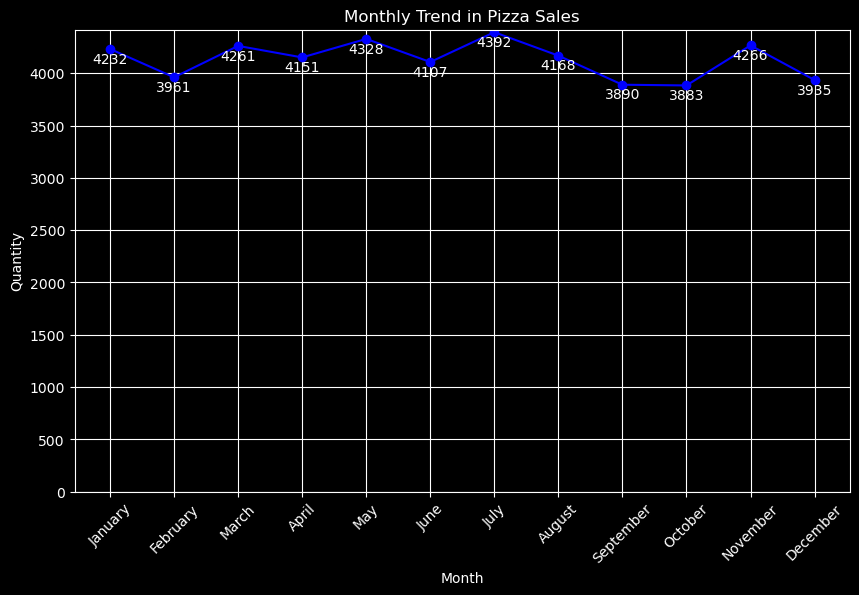

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_total['month'], monthly_total['quantity'], marker='o', linestyle='-', color='b')
plt.title('Monthly Trend in Pizza Sales')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0)

for i, row in monthly_total.iterrows():
    plt.annotate(row['quantity'], (row['month'], row['quantity']), textcoords="offset points", xytext=(0,-10), ha='center')

plt.show()

## Daily Trend in Pizza Sales

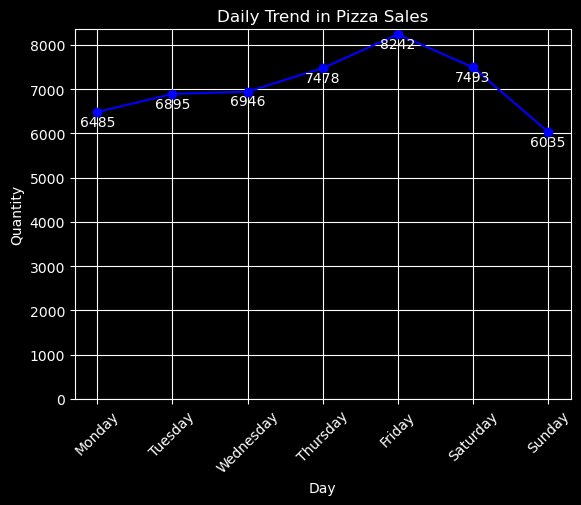

In [85]:
df['day_of_week'] = df['order_date'].dt.strftime('%A')
daily_totals = df.groupby('day_of_week')['quantity'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
plt.plot(daily_totals['day_of_week'], daily_totals['quantity'], marker='o', linestyle='-', color='b')
plt.title('Daily Trend in Pizza Sales')
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0)

for i, row in daily_totals.iterrows():
    plt.annotate(row['quantity'], (row['day_of_week'], row['quantity']), textcoords="offset points", xytext=(0,-10), ha='center')

plt.show()

## Sales Quantity per Pizza Size

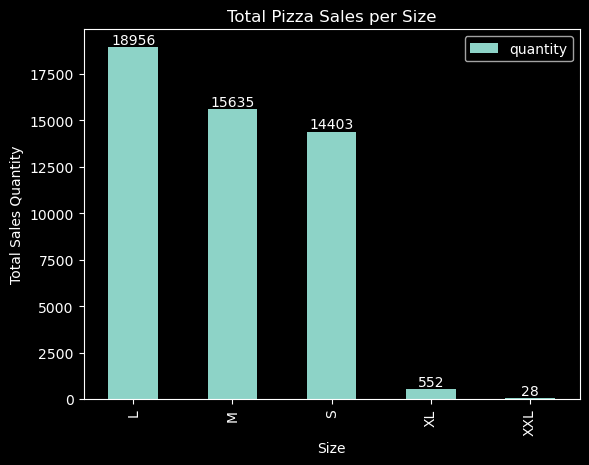

In [79]:
grouped_size = df.groupby('pizza_size')
summ3 = grouped_size[['quantity']].sum()
srt3 = summ3.sort_values(by="quantity", ascending= False)

ax = srt3.plot(kind='bar', title='Total Pizza Sales per Size', xlabel='Size', ylabel='Total Sales Quantity')

for i in ax.patches:
    ax.annotate(f"{i.get_height():.0f}", (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

plt.show()

## Sales Quantity per Pizza Category

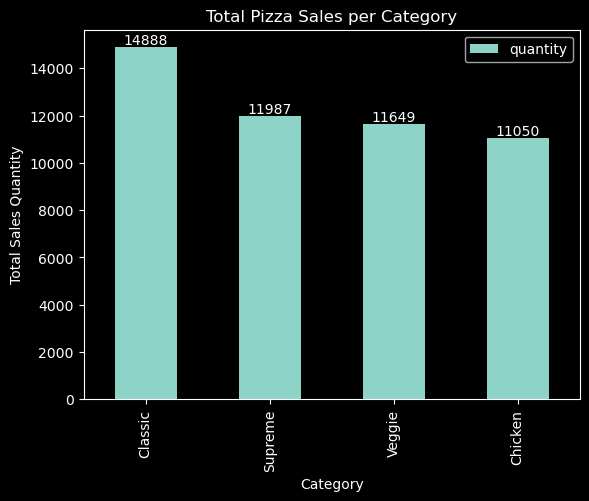

In [81]:
grouped_category = df.groupby('pizza_category')
summ4 = grouped_category[['quantity']].sum()
srt4 = summ4.sort_values(by="quantity", ascending= False)

ay = srt4.plot(kind='bar', title='Total Pizza Sales per Category', xlabel='Category', ylabel='Total Sales Quantity')

for i in ay.patches:
    ay.annotate(f"{i.get_height():.0f}", (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

plt.show()

## Total Ingredients Used

In [84]:
df['ingredients_list'] = df['pizza_ingredients'].str.split(',')
all_ingredients = [ingredient for sublist in df['ingredients_list'] for ingredient in sublist]
ingredient_counts = pd.Series(all_ingredients).value_counts().reset_index()
ingredient_counts.columns = ['Ingredient', 'Count']

pd.set_option('display.max_rows', None)

ingredient_counts

,Ingredient,Count
0,Garlic,27422
1,Tomatoes,23694
2,Red Onions,19547
3,Red Peppers,16284
4,Chicken,8443
5,Mushrooms,8114
6,Mozzarella Cheese,6605
7,Pepperoni,6542
8,Green Olives,6174
9,Artichokes,5682
